In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from SSA import SSA

In [2]:
df = pd.read_csv("../Data/American Companies/FORD 1994 2022.csv")
open_prices = np.array(df.Open)[-1000:]
dates = np.array(pd.to_datetime(df.Date, dayfirst= True))[-1000:]

test_size = -300

train_data = open_prices[:test_size]
test_data = open_prices[test_size:]

train_dates = dates[:test_size]
test_dates = dates[test_size:]

open_prices.shape, train_data.shape, train_dates.shape, test_data.shape, test_dates.shape

((1000,), (700,), (700,), (300,), (300,))

In [3]:
N = len(train_data)
L = 50
K = N - L + 1
r = None

components = SSA.get_components(train_data, L)

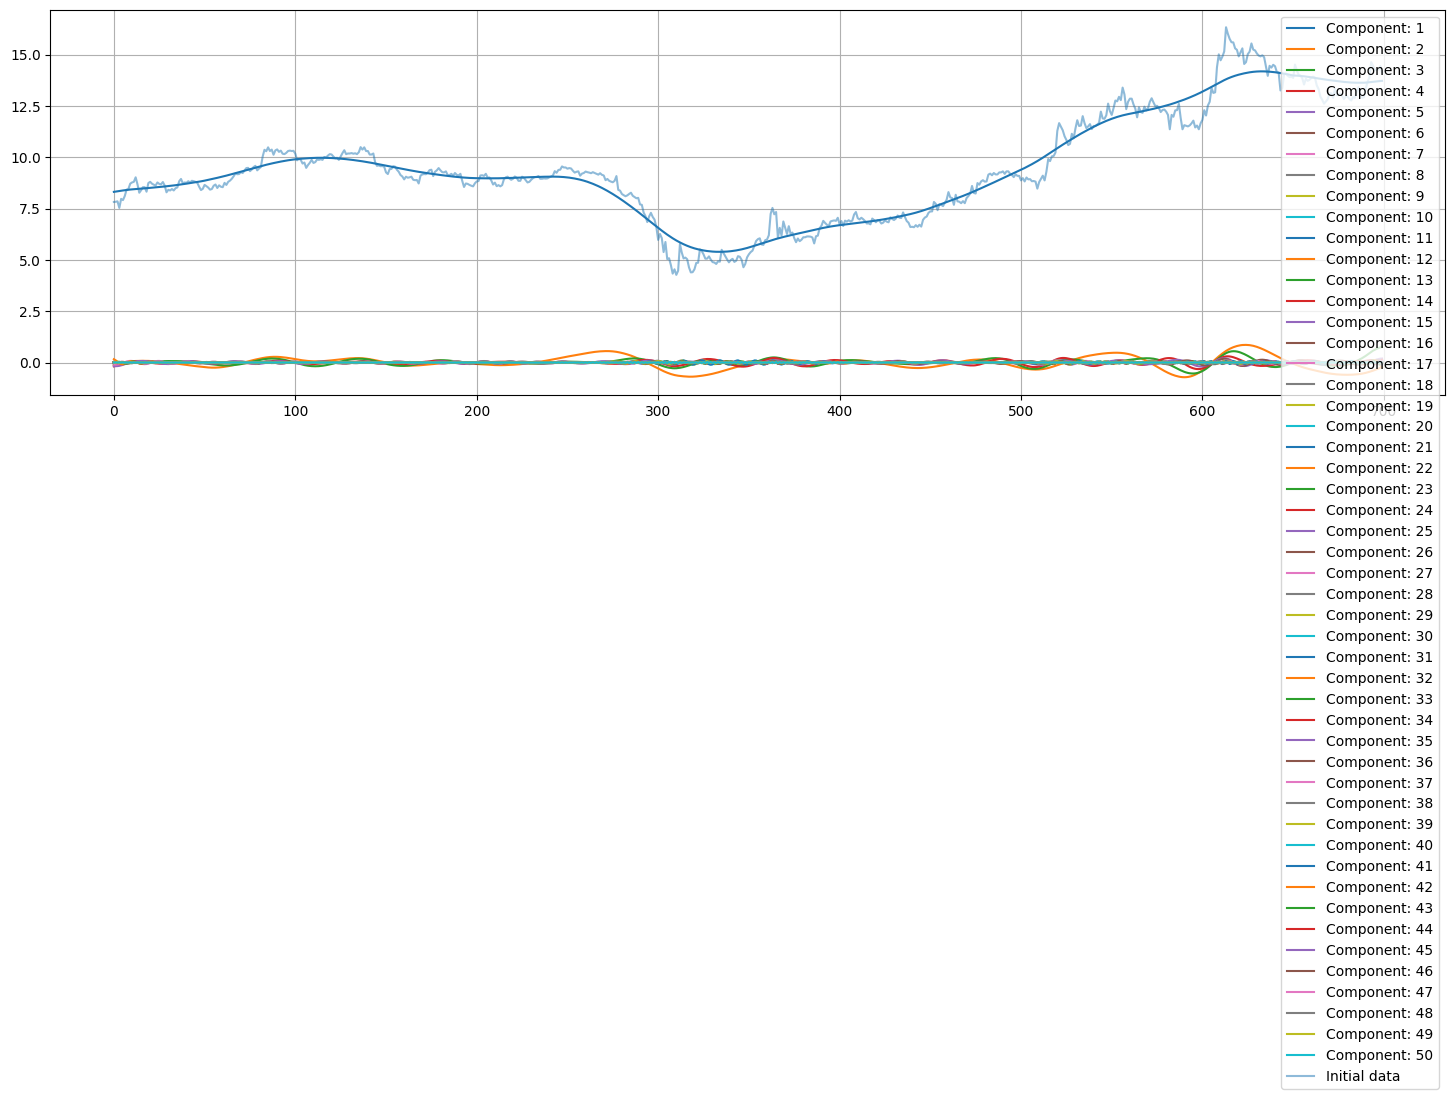

In [4]:
plt.figure(figsize= (18, 5))
plt.grid(True)
for ind, x in enumerate(components):
    plt.plot(x, label= f"Component: {ind + 1}")
plt.plot(train_data, label= "Initial data", alpha= 0.5)
plt.legend(loc= "best")
plt.show()

In [5]:
forecast = SSA.forecast(train_data, K, abs(test_size), 25)

In [ ]:
plt.figure(figsize= (18, 8))
plt.grid(True)
plt.plot(train_dates, train_data, label= "Train наблюдения")
plt.plot(test_dates, test_data, label= "Test наблюдения")
plt.plot(test_dates, forecast, label= "Test предсказания")
plt.legend(loc= "best")
plt.show()